In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')

In [2]:
alldata = pd.read_csv('alldata.csv')

In [3]:
alldata.head(10)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [4]:
# Null values

alldata['reviews'] = alldata['reviews'].fillna(0) #replace null values with 0.
alldata = alldata.dropna(axis=0, how = 'any') #remove rows with all null values


In [5]:
sum(alldata.isnull().any(axis=1)) # check if the removal of null's is successful

0

In [6]:
alldata.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [7]:
alldata['position'].describe()

count               6953
unique              5242
top       Data Scientist
freq                 351
Name: position, dtype: object

In [8]:
alldata['description'].describe()

count                                                  6953
unique                                                 6708
top       Note: By applying to this position your applic...
freq                                                      9
Name: description, dtype: object

In [9]:
alldata['position'].value_counts()

Data Scientist                           351
Senior Data Scientist                     96
Research Analyst                          64
Data Engineer                             60
Machine Learning Engineer                 56
                                        ... 
Data Scientist, Marketing - Ecommerce      1
Retail Financial Analyst                   1
Science Reporter                           1
Account Manager (Austin, TX)               1
RESEARCH CONSULTANT                        1
Name: position, Length: 5242, dtype: int64

In [10]:
alldata['company'].value_counts()

Amazon.com                    358
Ball Aerospace                187
Microsoft                     137
Google                        134
NYU Langone Health             77
                             ... 
Evidation Health                1
Heart Rhythm Society (HRS)      1
LEWIS                           1
Mynd                            1
D&K Engineering                 1
Name: company, Length: 2213, dtype: int64

In [11]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

In [12]:
# Check if there are any NaNs in the data

alldata.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [13]:
# Drop column Review from the data

alldata.drop(columns = 'reviews', inplace = True)

In [14]:
# Create city and state columns to better aggregate the data

alldata['location'] = alldata.location.apply(lambda x: re.sub('\d*','',str(x)))
alldata['city'] = alldata.location.apply(lambda x: x.split(',')[0].strip())
alldata['state'] = alldata.location.apply(lambda x: x.split(',')[1].strip())
alldata['location'] = alldata['city']+ ', ' + alldata['state']
alldata.head()

,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


In [15]:
# Group position name into 5 types 

data = alldata.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]


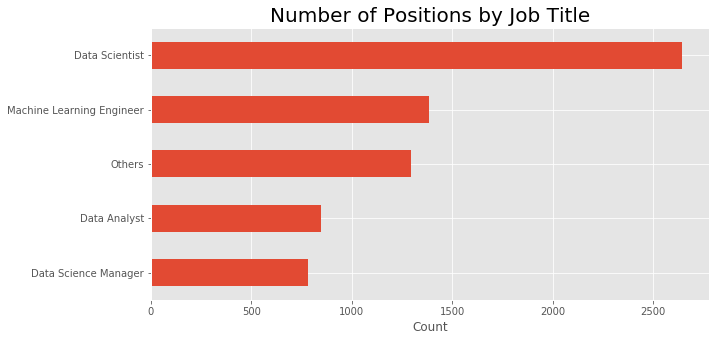

In [16]:
# What is the is the most common job to appear when searching for 'Data Science'? 

title = data.groupby(['position']).count().sort_values('company')

title['company'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()

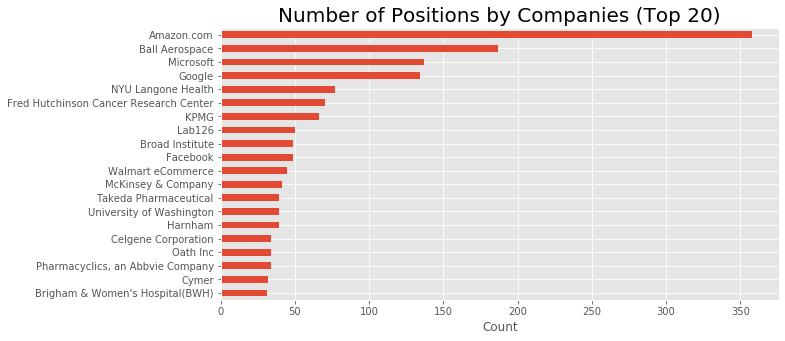

In [17]:
# Which company hire the most Data Science job?

company = alldata.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()


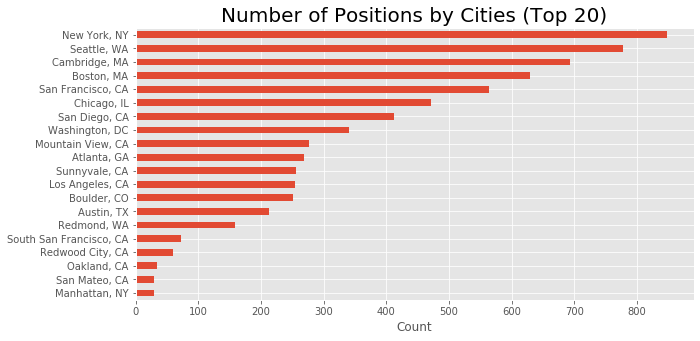

In [18]:
# From the data, which cities and state hire the most?

city = alldata.groupby(['location']).count().sort_values('position').tail(20)

city['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

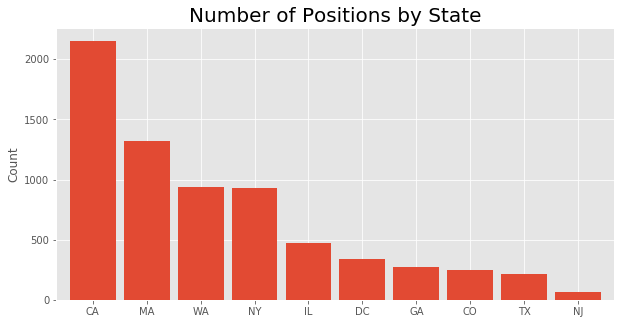

In [19]:
# Positions by state

state = alldata.groupby('state').count().sort_values('position',ascending = False)

state['position'].plot(kind = 'bar',figsize = (10,5) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()

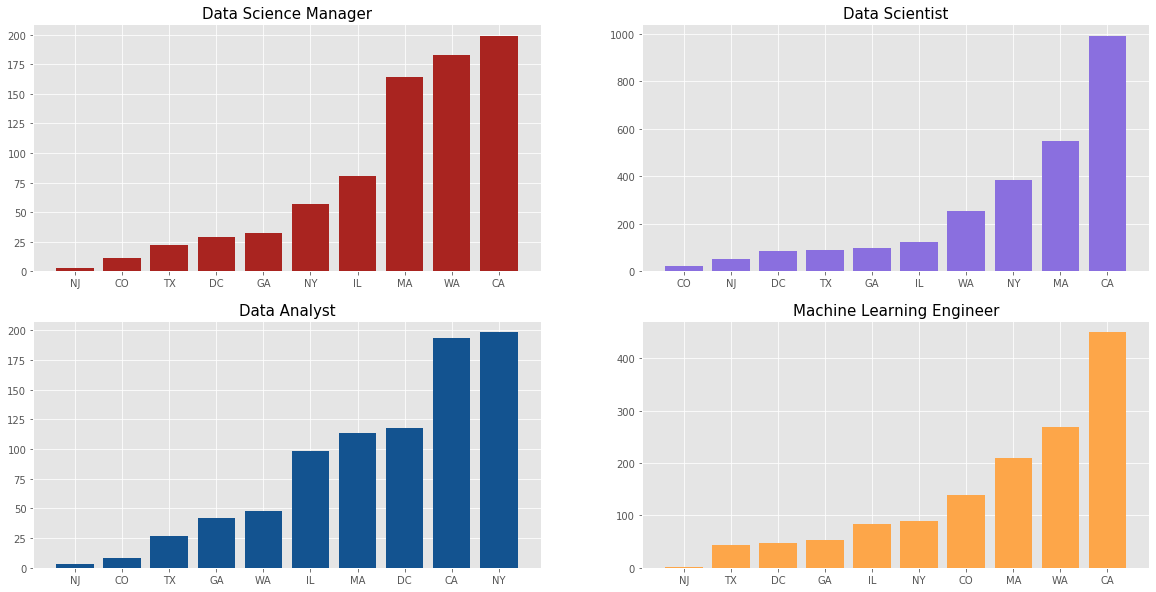

In [20]:
# Position by state and job title

data = data[data['position'] != 'Others']
i = 1
color = ['#A92420','#8A6FDF','#135390','#FDA649']
fig = plt.figure(figsize=(20,10))
for position in data.position.unique():
    x = data[data['position']== str(position)].groupby(['state']).count().sort_values('company')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(position), size = 15)
plt.show()


In [21]:
# Combine the desciptions by the job tilte

data = data.groupby('position').agg(lambda col: ' '.join(col))
data = data[['description']]

In [22]:
# Create a function to clean text data

def clean_text(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).lower() #remove punctutations
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n',' ',text)
    return text

In [23]:
# Clean the text data and remove the job title 'Others'

clean = lambda x :clean_text(x)
df_clean = pd.DataFrame(data.description.apply(clean))
df_clean = df_clean[df_clean.index != 'Others'].copy()

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
# Lemmentize the text data to improve analysis

lemmer = WordNetLemmatizer()
df_clean['description'] = df_clean.description.apply(lambda x: word_tokenize(x))
df_clean['description'] = df_clean.description.apply(lambda x : [lemmer.lemmatize(y) for y in x])
df_clean['description'] = df_clean.description.apply(lambda x: ' '.join(x))

In [ ]:
# Add words that frequently appear in the descriptions but carry no value to the list of stop words

from sklearn.feature_extraction import text
extra_stopword = ['data','experience','work','team','will','skill','year','skills', 'location', 'role', 'overview', 'every', 'applie', 'description', 'name']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1600, height=800)
i = 0
fig = plt.figure(figsize=(15,8))
for x in df_clean.description.index:
    wc.generate(df_clean.description[str(x)])
    
    i += 1
    fig.add_subplot(2, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size = 15)
plt.show()

In [ ]:
plot_wordcloud(df_clean, title="Word Cloud of Data Analyst Descriptions")

In [ ]:
from nltk.corpus import brown
brown.words()